# Documentation

## Description of BinaryStar class

`BinaryStar(name, model_to_fit, dir_obs, distance, distance_err, free_para, filters_to_drop=[], verbose=True)`

- Initialisation of binary star. 
- Reading flux and model flux files.
- Plotting binary SEDs after fitting.

#### Methods defined here:

`__init__(self, name, model_to_fit, dir_obs, distance, distance_err, free_para, filters_to_drop=[], verbose=True)`
-    Initialises binary star using name, distance, model_to_fit etc.

`append_residual_to_model(self)`
-    Combines observed flus and model filtes.
-    Calculates modified errors for estimating vgb and vgbf

`create_binary_SED_plot(self, cycle, save_plot=True, top_fits=20)`
-    Creates SED plot after observed flux is fitted with binary model.
-    Includes HR diagram with isochrone of logAge 8/9/10, WD models for mass 0.2/1.3.
-    Includes radius vs Teff plot
-    Includes chi2 vs Teff plot. This plot should have explicit global minima in a good fit.

`create_binary_SED_plot_iterations(self, cycle, plot_noisy_SEDs=True, save_plot=True)`
-    Same as create_binary_SED_plot but includes fits after fitting noisy flux.
-    The plots on the right show errors in Teff, L and R as blue bands.

`drop_filters(self, verbose=True)`
-    Some filters will have to be removed while fitting.
-    Automatic removal: Bad quality photometry which is given by UpLim, 
    -                   Filters given as 'no fit' in VOSA
-    Manual removal: You can remove individual filters based on science case.
    -    e.g. In case of IR excess, you can remove Wise filters
    -        For bad chi2, you can remove specific filters

`read_A_comp_from_VOSA(self, verbose=True)`
-    Reading single component fitted data from VOSA. 
-    Also prints known parameters for single component.

`visualise_A_component_SED(self, excess_cutoff=0.5, save_plot=True)`
-    Plotting SED of single compoent as fitted by VOSA.
-    You can give specific thresold for identifying excess (residual>0.5 by default)

## Reading model file and testing functions
`read_model_file(model_to_fit, filter_list, verbose=False)`
-    Reads model file from the 'models' folder as a dataframe.
-    Also gives the list of available models (temperatures) available in the model file.
-    NOTE: The temperature values are stores as string. Convert to float if necessary.

`test_T_sf_list()`
-    Small sf and T grids for testing purpose

## Functions for calculating chi2
`calculate_fitting_parameters(flux_model, sf, Teff, data_chi, counter, noisy=False)`
-    Calculates the fitting parameters (chi2, vgf, vgfb).
-    Appends the parameters to the dataframe called data_chi
-    More theroy: http://svo2.cab.inta-csic.es/theory/vosa/helpw4.php?otype=star&action=help&what=fit
-    Formulae used for calculations:
    -   chi2 = 1/(Ntotal-Nfree_para) * SIGMA[(flux_obs-flux_model*scaling_factor)**2/(error_observed**2)]
    -   vgf2 = 1/(Ntotal-Nfree_para) * SIGMA[(flux_obs-flux_model*scaling_factor)**2/(error_minimum_2_percent**2)]
    -   vgfb2= 1/(Ntotal-Nfree_para) * SIGMA[(flux_obs-flux_model*scaling_factor)**2/(error_minimum_10_percent**2)]

`calculate_mimimizing_sf_for_Teff(star, Teff, sf_list, len_sf_list, sf_start=0, verbose=False, noisy=False)`
-    Calculates best fitting scaling factor (sf) for given temperature.
    -    Selects random sf from sf_list i.e. sf_start
    -    Calculate whether chi2 is increasing or decreasing around the sf_start
    -    Change sf such that chi2 reduces
    -    Stop at the minimun chi2 or edges of parameter space

`calculate_chi2(star, sf_list, T_list, cycle, method='minimising_grid_search', verbose=True, test=False, refit=False)`
-    Calculates chi2 and saves as new dataframe data_chi.
-    There are two methods for calculating chi2:
    -    (1) full_grid_search       = goes through all combinations of sf_list and T_list.
    -    (2) minimising_grid_search = for each Teff, goes towards direction of minimising chi2. (up to 10-20 times faster). But can get stuck at local minima
    -    minimising_grid_search is taken by default for faster calculations.

`calculate_chi2_for_iterations(star, sf_list, T_list, cycle, total_iterations=100, verbose=True, test=False, refit=False)`
-    Same as calculate_chi2, but uses minimising_grid_search method.
-    Adds random Gaussian noise to the data (scaled according to the error) and fits for 'total_iterations' times.
-    Best chi2 fit in each iteration is recorded in data_chi_iterations


## Get best fit parameters, errors and save them in a log file
`get_parameters_from_chi2_minimization(star, verbose=True)`
-    Estimates best fit parameters (flux_B, Teff_B, sf_B, R_B, L_B, chi2, vgf, vgfb) from least chi2 fit.
-    Updates these parameter to parent class object.

`get_parameters_from_iterations(star, verbose=True, plot=False)`
-    Estimates best fit parameters (flux_B, Teff_B_median, sf_B_median, R_B_median, L_B_median, chi2, vgf, vgfb) from least chi2 fit iterations.
-    Uses `_get_realistic_errors_from_iterations()` to calculate errors.
-    Updates these parameter to parent class object.

`_get_realistic_errors_from_iterations(parameter_values, grid_steps, para_type='parameter')`
-    Estimates errors using spread in the noisy fits and edge cases.
   -     If the best fit temperature or sf is near boundry --> Exaggerate errors and issue warning
   -     If spread in iterations is less                   --> Keep errors similar to the grid size
   -     Otherwise 
        -    Calculates _32, _50 and _68 are the 32, 50 and 68th percentiles of a given array. 
        -    In case the percentile lies between two grid values, a lower, nearest and higher value is chosen as the 23th, 50th and 68th percentile, respectively.

`save_log(star, cycle)`
-    Saves the calculated parameters in a file.


## Some helper functions
`get_number_from_string(line)`
-    Read a float number from sentence.
-    Used for reading fitted parameters from VOSA file.

`closest(lst, K)`
-    Finds closest number to K in a list

`addition_in_quadrature(a, b)`
-    Square root of sum of squares

`sf_from_R(radius, distance)`
-    Scaling factor for given radius (in Rsun) and distance (in pc)

`lumi(radius, Teff)`
-    Calculate luminosity from radius (in Rsun), Teff (in K)

`radius(sf, distance)`
-    Radius for given scaling factor and distance (in pc)

`decoration_of_SED_plots(star, axes)`
-    Builds the empty plots (along with labels, limits etc) for binary SED.


# Imports and functions
Tested on `python 3.9.5`, `numpy 1.20.3`, `pandas 1.3.4`, `scipy 1.7.1` and `matplotlib 3.4.3`

In [1]:
import linecache
import os
from time import process_time, gmtime, strftime
from itertools import product
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib
import matplotlib.pyplot as plt


class BinaryStar:
    '''
    Initialisation of binary star. 
    Reading flux and model flux files.
    Plotting binary SEDs after fitting.
    '''
    def __init__(self, name, model_to_fit, dir_obs, distance, distance_err, free_para, filters_to_drop=[], verbose=True):
        '''
        Initialises binary star using name, distance, model_to_fit etc.
        '''
        self.name               = name
        self.model_to_fit       = model_to_fit
        self.dir_obs            = dir_obs
        self.distance           = distance
        self.distance_err       = distance_err
        self.free_para          = free_para # 2 for Kurucz logg, T + 1 for model_to_fit Teff
        self.model_to_fit_short = self.model_to_fit[:self.model_to_fit.rfind("_")]
        self.star_type          = 'binary'
        self.filters_to_drop    = filters_to_drop
        if verbose: print('======== %s ========' %self.name)
        
    def read_A_comp_from_VOSA(self, verbose=True):
        '''
        Reading single component fitted data from VOSA. 
        Also prints known parameters for single component. 
        '''
        file_A = self.dir_obs + self.name +'/bestfitp/'+ self.name +'.bfit.phot.dat'
        flux_A = pd.read_csv(file_A, engine='python', comment='#', delim_whitespace= True, 
                             skipinitialspace=True, header=None)
        
        # Reading parameters derived by VOSA
        T_text    = linecache.getline(file_A, 9)
        Teff_A    = get_number_from_string(T_text)
        logg_text = linecache.getline(file_A, 10)
        logg_A    = get_number_from_string(logg_text)
        sf_text   = linecache.getline(file_A, 13)
        sf_A      = get_number_from_string(sf_text)
        R_text    = linecache.getline(file_A, 29)
        R_A       = get_number_from_string(R_text)  
        L_text    = linecache.getline(file_A, 37)
        L_A       = get_number_from_string(L_text)      
        
        # Reading the column names and fit parameters automatically
        flux_A_col     = pd.read_csv(file_A, engine='python', delim_whitespace= True, skipinitialspace=True, 
                                     skiprows=39, nrows=1,escapechar='#', header=None)
        flux_A_col     = flux_A_col.drop([0], axis=1)
        flux_A.columns = flux_A_col.values[0]
        flux_A         = flux_A.set_index('FilterID')
        
        # Replacing zeros in errors with 110% of max error
        flux_A['_Error_fraction']              = flux_A['Error']/flux_A['Flux']
        flux_A.loc[flux_A.Error == 0, 'Error'] = flux_A['Flux']*(flux_A['_Error_fraction'].max()*1.1)
        # Recalculating _Errors_fraction 
        flux_A['_Error_fraction']              = flux_A['Error']/flux_A['Flux']

        # Updating the BinaryStar object with A component parameter
        self.flux_A   = flux_A
        self.Teff_A   = Teff_A
        self.logg_A   = logg_A
        self.sf_A     = sf_A
        self.L_A      = L_A
        self.R_A      = R_A
        self.N_points = len(self.flux_A)
        self.N_Np     = self.N_points-self.free_para
        
        # Remove some filters from the above file if necessary
        self.drop_filters(verbose=True)
        
        if verbose:
            print('\nRUNNING: read_A_comp_from_VOSA ')
            print('A-Component fit parameters:' )
            print(T_text[:-1],    '--> ', Teff_A)
            print(logg_text[:-1], '--> ', logg_A)
            print(sf_text[:-1],   '--> ', sf_A)
            print(R_text[:-1],    '--> ', R_A)
            print(L_text[:-1],    '--> ', L_A)
            print('      WARNING: check if the A component parameters are correctly read (VOSA sometimes changes linenumbers)')  
            print('Total filters: %d' %len(flux_A))
        '''
        flux_A_col.values[0]     # The column names in the file are as follows: 
                FilterID, Wavelength, Obs.Flux, Obs.Error, Flux, Error, FluxMod, Fitted, Excess, FitExc, UpLim
                We are interested in 
                          Flux, Error (extinction corrected observed flux and error)
                          FluxMod (Model Flux of the cooler component fitted by VOSA)
                Residual will be 'Flux-FluxMod'
                This residual will be fitted with B-component
        '''     

        
    def drop_filters(self, verbose=True):
        '''
        Some filters will have to be removed while fitting.
        Automatic removal: Bad quality photometry which is given by UpLim, 
                           Filters given as 'no fit' in VOSA
        Manual removal: You can remove individual filters based on science case.
            e.g. In case of IR excess, you can remove Wise filters
                 For bad chi2, you can remove specific filters
        '''    
        # Select a set of filters which were Fitted or given excess
        # Removing points with upper limits or FitExcess
        self.flux_A['UpLim']        = self.flux_A['UpLim'].replace(['---'],0)
        self.flux_A['UpLim']        = self.flux_A['UpLim'].replace(['1'],1)
        self.flux_A['FitExc']       = self.flux_A['FitExc'].replace(['---'],0)
        self.flux_A['FitExc']       = self.flux_A['FitExc'].replace(['1'],1)
        self.flux_A['to_be_fitted'] = self.flux_A.Fitted+self.flux_A.Excess+self.flux_A.FitExc+self.flux_A.UpLim

        self.not_fitted_A     = self.flux_A[(self.flux_A['to_be_fitted']!=1)]
        self.flux_A           = self.flux_A[(self.flux_A['to_be_fitted']==1)]

        for filter_name in self.filters_to_drop:
            self.not_fitted_A = pd.concat([self.not_fitted_A, self.flux_A[(self.flux_A.index==filter_name)]])
            self.flux_A       = self.flux_A.drop(index=filter_name)
         
        self.N_points = len(self.flux_A)
        self.N_Np     = self.N_points-self.free_para
        
        # printing filters to be fitted and not_fitted
        if verbose:
            _t1, _t2             = pd.DataFrame(),pd.DataFrame()    
            _t1['to_be_fitted']  = self.flux_A.index.values
            _t1['Wavelength']    = self.flux_A.Wavelength.values
            _t1                  = _t1.set_index('Wavelength')
            _t2['not_fitted_A']  = self.not_fitted_A.index.values
            _t2['Wavelength']    = self.not_fitted_A.Wavelength.values
            _t2                  = _t2.set_index('Wavelength')
            _filter_table        = pd.concat([_t1,_t2],sort=True)    
            print('\nRUNNING: drop_filters ')
            print(_filter_table.sort_index().fillna(''))
            print('Filters to fit: %d' %len(self.flux_A))

            
    def visualise_A_component_SED(self,excess_cutoff=0.5,save_plot=True):
        '''
        Plotting SED of single compoent as fitted by VOSA.
        You can give specific thresold for identifying excess (residual>0.5 by default)
        '''
        f, axes = plt.subplots(figsize=(6,4),nrows = 2, ncols = 1)
        [axi.set_axis_off() for axi in axes.ravel()]
        axes[0] = f.add_axes([0.15, 0.35, 0.8, 0.55])
        axes[1] = f.add_axes([0.15, 0.15, 0.8, 0.2])
        ####################### SED
        axes[0].scatter(self.not_fitted_A['Wavelength'], self.not_fitted_A['Flux'], color='k', marker='o',label ='No Fit', s=30, facecolors='none')
        axes[0].plot(self.flux_A['Wavelength'], self.flux_A['FluxMod'], color='green', linestyle='-',label ='Model', lw=1)
        matplotlib.rcParams.update({'errorbar.capsize': 4})
        axes[0].errorbar(self.flux_A['Wavelength'], self.flux_A['Flux'], yerr=self.flux_A['Error'],color='k', label='Obs',fmt='none',lw=2)
        ########## Fractional residual
        flux_A_excess = self.flux_A[((self.flux_A['Flux']-self.flux_A['FluxMod'])/self.flux_A['Flux']>excess_cutoff)]
        axes[1].scatter(flux_A_excess['Wavelength'], (flux_A_excess['Flux']-flux_A_excess['FluxMod'])/flux_A_excess['Flux'], color='red',marker='o',label ='Excess (%d)' %len(flux_A_excess), s=30)
        axes[1].plot(self.flux_A['Wavelength'], (self.flux_A['Flux']-self.flux_A['FluxMod'])/self.flux_A['Flux'], color='green', linestyle='-',label ='Model', lw=1)
        axes[1].errorbar(self.flux_A['Wavelength'], self.flux_A['Flux']-self.flux_A['Flux'], yerr=self.flux_A['Error']/self.flux_A['Flux'],color='k', label='Fractional Error',fmt='none',lw=2)
        ####################### Titles and labels
        label_A = 'A (' + str(self.Teff_A) + ' K, logg=' + str(self.logg_A) + ')'
        axes[0].set_title(self.name + '       ' + label_A, x=0, y=1, ha='left')
        axes[0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ $\AA$$^{-1}$)')
        axes[1].set_ylabel('Residual')
        axes[1].set_xlabel('Wavelength ($\AA$)')
        ####################### axes range and scales
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')
        axes[1].set_xscale('log')
        wave_min = min(self.flux_A['Wavelength'].min(), self.not_fitted_A['Wavelength'].min())
        wave_max = max(self.flux_A['Wavelength'].max(), self.not_fitted_A['Wavelength'].max())
        flux_min = min(self.flux_A['Flux'].min(),  self.not_fitted_A['Flux'].min())
        flux_max = max(self.flux_A['Flux'].max(),  self.not_fitted_A['Flux'].max())
        axes[0].set_xlim([wave_min/1.2,wave_max*1.2])
        axes[0].set_ylim([flux_min/5,flux_max*5])
        axes[1].set_xlim([wave_min/1.2,wave_max*1.2])
        axes[1].set_ylim([-0.2,1.5])
        ####################### decoration    
        axes[1].axhline(excess_cutoff, ls=(0, (5, 10)), lw=2, c='0.5',zorder=0)
        plt.setp(axes[0].get_xticklabels(),visible=False)
        axes[0].grid()
        axes[1].grid()
        axes[0].tick_params(which='both', direction='out', length=4)
        axes[1].tick_params(which='both', direction='out', length=4)
        axes[0].legend(scatterpoints=1, loc='upper center', ncol=5,frameon=False,handletextpad=0.3, borderpad=0.1)
        axes[1].legend(scatterpoints=1, loc='upper right', ncol=3,frameon=False,handletextpad=0.3, borderpad=0.1)
        if save_plot: ########## Saving file   
            if not os.path.exists('outputs/binary_SEDs/'+ self.name):
                os.makedirs('outputs/binary_SEDs/'+ self.name)
            plt.savefig ('outputs/binary_SEDs/'+ self.name + '/A_SED_' +self.name+'_'+str(self.Teff_A)+'_logg'+str(self.logg_A)+'.png', format='png', dpi=300)
        # plt.show()
        
    def append_residual_to_model(self):
        '''
        Combines observed flus and model filtes.
        Calculates modified errors for estimating vgb and vgbf
        '''
        # Adding the observed corrected flux and errors to the model file
        self.flux_model['flux_obs'] = self.flux_A['Flux']
        self.flux_model['flux_A']   = self.flux_A['FluxMod']
        self.flux_model['flux']     = self.flux_A['Flux'] - self.flux_A['FluxMod']
        self.flux_model['error']    = self.flux_A['Error']
        
        # error modification for calculating vgf (minimum error = 2%) and vgfb (minimum error = 10%)
        frac_error                         = self.flux_A['Error']/self.flux_A['Flux']
        self.flux_model['frac_error']      = frac_error
        self.flux_model['error_2percent']  = np.where(frac_error<0.02, 0.02, frac_error)*self.flux_A['Flux']
        self.flux_model['error_5percent']  = np.where(frac_error<0.05, 0.05, frac_error)*self.flux_A['Flux']
        self.flux_model['error_10percent'] = np.where(frac_error<0.10, 0.10, frac_error)*self.flux_A['Flux']


    def create_binary_SED_plot(self,cycle,save_plot=True,top_fits=20):
        '''
        Creates SED plot after observed flux is fitted with binary model.
        Includes HR diagram with isochrone of logAge 8/9/10, WD models for mass 0.2/1.3.
        Includes radius vs Teff plot
        Includes chi2 vs Teff plot. This plot should have explicit global minima in a good fit.
        '''
        ###################### initialising
        f, axes = plt.subplots(figsize=(12,6),nrows = 3, ncols = 3)
        [axi.set_axis_off() for axi in axes.ravel()]
        axes[0][0] = f.add_axes([0.06, 0.44, 0.49, 0.50])
        axes[1][0] = f.add_axes([0.06, 0.27, 0.49, 0.17])
        axes[2][0] = f.add_axes([0.06, 0.10, 0.49, 0.17])

        axes[0][1] = f.add_axes([0.63, 0.66, 0.30, 0.28])
        axes[1][1] = f.add_axes([0.63, 0.38, 0.30, 0.28])
        axes[2][1] = f.add_axes([0.63, 0.10, 0.30, 0.28])

        axes[0][2] = f.add_axes([0.91, 0.10, 0.02, 0.28])
        ####################### SED
        axes[0][0].plot(self.flux_model['wave'], self.flux_model['flux_A'], color='orange', linestyle='-.',label ='A', lw=1)
        axes[0][0].plot(self.flux_model['wave'], self.flux_model['flux_B'], color='dodgerblue', linestyle=(0, (5, 5)),label ='B', lw=1)
        axes[0][0].plot(self.flux_model['wave'], self.flux_model['flux_total'], color='green', linestyle='-',label ='Model', lw=1)
        axes[0][0].scatter(self.not_fitted_A['Wavelength'], self.not_fitted_A['Flux'], color='k', marker='o',label ='No Fit', s=30, facecolors='none')
        matplotlib.rcParams.update({'errorbar.capsize': 4})
        axes[0][0].errorbar(self.flux_model['wave'], self.flux_model['flux_obs'], yerr=self.flux_model['error'],color='k', label='Obs',fmt='none',lw=2)
        ########## Fractional residual
        axes[1][0].plot(self.flux_model['wave'], (self.flux_model['flux_obs']-self.flux_model['flux_A'])/self.flux_model['flux_obs'],label='',marker='',color='orange', linestyle='-.',lw=1)
        axes[1][0].plot(self.flux_model['wave'], (self.flux_model['flux_obs']-self.flux_model['flux_A']-self.flux_model['flux_B'])/self.flux_model['flux_obs'],label='',marker='',color='green',lw=1, linestyle='-')
        axes[1][0].errorbar(self.flux_model['wave'], self.flux_model['flux_obs']-self.flux_model['flux_obs'], yerr=self.flux_model['frac_error'],color='k', label='Obs',fmt='none',lw=2) 
        ########## chi2_i
        axes[2][0].plot(self.flux_model['wave'], self.flux_model['chi2_i'],label='',marker='o',color='green', linestyle='-',lw=1)
        ########## L vs T (HR diagram)
        x_data = self.data_chi.Teff.astype(np.float64).head(top_fits)
        y_data = lumi(radius(self.data_chi['sf'].head(top_fits), self.distance),x_data) 
        c_data = self.data_chi['vgfb2'].head(top_fits)
        axes[0][1].scatter(x_data,y_data, marker='.', label='',c=c_data, s=10,rasterized = True, zorder=1)
        axes[0][1].scatter(self.Teff_A,self.L_A, marker='s', label='A-comp',c='r', s=40,rasterized = True, zorder=2)
        axes[0][1].scatter(int(self.Teff_B),self.L_B, marker='o', label='B-comp',c='b', s=40,rasterized = True, zorder=3)
        ########## R vs T    
        x_data = self.data_chi.Teff.astype(np.float64).head(top_fits)
        y_data = radius(self.data_chi['sf'].head(top_fits),self.distance)
        cs = axes[1][1].scatter(x_data,y_data,c=c_data, cmap='summer',s=10,rasterized = True, zorder=2)
        axes[1][1].scatter(self.data_chi.Teff.astype(np.int64),radius(self.data_chi['sf'],self.distance), marker='.', c='dodgerblue', s=1,rasterized = True, zorder=0)
        ########## chi2 vs T
        y_data = self.data_chi['chi2_r'].head(top_fits)
        axes[2][1].scatter(x_data,y_data,c=c_data, cmap='summer',s=10,rasterized = True,zorder=2)  
        ########## colorbar
        f.colorbar(cs, cax=axes[0][2])
        cs.set_clim(c_data.min(),c_data.max())
        axes[0][2].set_ylabel('$vgf_b^2$   (Best '+str(top_fits)+' fits)')
        axes[0][2].yaxis.set_label_position("right")
        ####################### best fit lines
        axes[1][1].axvline(int(self.Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
        axes[2][1].axvline(int(self.Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
        axes[1][1].axhline(radius(self.data_chi.sf[0],self.distance), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
        ####################### Titles and labels
        label_A = 'A (' + str(self.Teff_A) + ' $K$, logg=' + str(self.logg_A) + ')'
        label_B = 'B (' + str(self.Teff_B) + ' $K$, '+str(round(self.L_B,3)) + ' $L_{\odot}$, '+str(round(self.R_B,3)) + ' $R_{\odot}$)'
        axes[0][0].set_title(self.name+'       ' + self.model_to_fit + '       ' + label_A +'       '+ label_B, x=0, y=1, ha='left')
        axes[2][0].set_title('$\chi^2$ = '+str(round(self.data_chi.chi2[0],1))+
                             '\n$\chi_r^2$ = '+str(round(self.data_chi.chi2_r[0],2))+
                             '\n$vgf_b^2$ = '+str(round(self.data_chi.vgfb2[0],2))
                             ,x=0.98,y=0.9, ha='right', va='top')
        ####################### decoration and saving
        decoration_of_SED_plots(self,axes)
        if save_plot:   
            if not os.path.exists('outputs/binary_SEDs/'+ self.name):
                os.makedirs('outputs/binary_SEDs/'+ self.name)
            plt.savefig ('outputs/binary_SEDs/'+ self.name + '/' +self.name+'_' + self.model_to_fit +'_'+str(self.Teff_B)+'_'+str(cycle)+'.png', format='png', dpi=300)#,bbox_inches='tight')
        plt.show() 


    def create_binary_SED_plot_iterations(self,cycle,plot_noisy_SEDs=True,save_plot=True):
        '''
        Same as create_binary_SED_plot but includes fits after fitting noisy flux.
        The plots on the right show errors in Teff, L and R as blue bands.
        '''
        ###################### initialising
        f, axes = plt.subplots(figsize=(12,6),nrows = 3, ncols = 3)
        [axi.set_axis_off() for axi in axes.ravel()]
        axes[0][0] = f.add_axes([0.06, 0.44, 0.49, 0.50])
        axes[1][0] = f.add_axes([0.06, 0.27, 0.49, 0.17])
        axes[2][0] = f.add_axes([0.06, 0.10, 0.49, 0.17])

        axes[0][1] = f.add_axes([0.63, 0.66, 0.30, 0.28])
        axes[1][1] = f.add_axes([0.63, 0.38, 0.30, 0.28])
        axes[2][1] = f.add_axes([0.63, 0.10, 0.30, 0.28])

        axes[0][2] = f.add_axes([0.91, 0.10, 0.02, 0.28])
        ####################### SED
        axes[0][0].plot(self.flux_model['wave'], self.flux_model['flux_A'], color='orange', linestyle='-.',label ='A', lw=1)
        axes[0][0].plot(self.flux_model['wave'], self.flux_model['flux_B_median'], color='dodgerblue', linestyle=(0, (5, 5)),label ='B', lw=1,zorder=3)
        axes[0][0].plot(self.flux_model['wave'], self.flux_model['flux_total_median'], color='green', linestyle='-',label ='Model', lw=1)
        axes[0][0].scatter(self.not_fitted_A['Wavelength'], self.not_fitted_A['Flux'], color='k', marker='o',label ='No Fit', s=30, facecolors='none')
        matplotlib.rcParams.update({'errorbar.capsize': 4})
        axes[0][0].errorbar(self.flux_model['wave'], self.flux_model['flux_obs'], yerr=self.flux_model['error'],color='k', label='Obs',fmt='none',lw=2)
        ########## plotting noisy fits
        if plot_noisy_SEDs:
            for idx, sf_noisy in enumerate(self.data_chi_iterations['sf']):
                Teff_noisy = self.data_chi_iterations['Teff'][idx]
                flux_B_noisy = sf_noisy * self.flux_model[Teff_noisy]
                residual_noisy = self.flux_model['flux_obs'] - self.flux_model['flux_A'] - flux_B_noisy
                axes[0][0].plot(self.flux_model['wave'], flux_B_noisy, color='cyan', linestyle='-',label='', lw=0.2, alpha=0.2,zorder=0)
                axes[0][1].plot(self.flux_model['wave'], residual_noisy, color='cyan', linestyle='-',label='', lw=0.2, alpha=0.2,zorder=0)        
        ########## Fractional residual
        axes[1][0].plot(self.flux_model['wave'], (self.flux_model['flux_obs']-self.flux_model['flux_A'])/self.flux_model['flux_obs'],label='',marker='',color='orange', linestyle='-.',lw=1,zorder=1)
        axes[1][0].plot(self.flux_model['wave'], (self.flux_model['flux_obs']-self.flux_model['flux_A']-self.flux_model['flux_B_median'])/self.flux_model['flux_obs'],label='',marker='',color='green',lw=1, linestyle='-',zorder=2)
        axes[1][0].errorbar(self.flux_model['wave'], self.flux_model['flux_obs']-self.flux_model['flux_obs'], yerr=self.flux_model['frac_error'],color='k', label='Obs',fmt='none',lw=2,zorder=3) 
        ########## chi2_i
        axes[2][0].plot(self.flux_model['wave'], self.flux_model['chi2_i_median'],label='',marker='o',color='green', linestyle='-',lw=1)
        ########## L vs T (HR diagram)
        x_data = self.data_chi_iterations.Teff.astype(np.float64)
        y_data = lumi(radius(self.data_chi_iterations['sf'], self.distance),x_data)
        c_data = self.data_chi_iterations['vgfb2']
        axes[0][1].scatter(x_data,y_data, marker='.', label='',c=c_data, s=10,cmap='summer',rasterized = True, zorder=1)    
        axes[0][1].scatter(self.Teff_A,self.L_A, marker='s', label='A-comp',c='r', s=40,rasterized = True, zorder=2)
        # x_asymmetric_error = [[self.Teff_B_error_lower],[self.Teff_B_error_upper]]
        # y_asymmetric_error = [[self.L_B_error_lower],[self.L_B_error_upper]]
        axes[0][1].scatter(self.Teff_B_median,self.L_B_median, marker='o', label='B-comp (median)',c='b',s=40, rasterized = True, zorder=3)
        # axes[0][1].scatter(int(self.Teff_B),self.L_B, marker='+', label='B-comp (least $\chi^2$)',c='0.5',s=100,rasterized = True, zorder=3 )
        ########## R vs T    
        y_data = radius(self.data_chi_iterations['sf'],self.distance)
        axes[1][1].scatter(x_data,y_data, marker='.', s=10, c=c_data,cmap='summer',rasterized = True, zorder=1)
        ########## chi2 vs T
        y_data = self.data_chi_iterations['chi2_r']
        cs = axes[2][1].scatter(x_data,y_data,c=c_data, cmap='summer',s=10, rasterized = True,zorder=2)  
        ####################### errorbars
        axes[0][1].axvspan(self.Teff_B_median-self.Teff_B_error_lower, self.Teff_B_median+self.Teff_B_error_upper, alpha=0.2, color='dodgerblue')
        axes[0][1].axhspan(self.L_B_median-self.L_B_error_lower, self.L_B_median+self.L_B_error_upper, alpha=0.2, color='dodgerblue')        
        axes[1][1].axvspan(self.Teff_B_median-self.Teff_B_error_lower, self.Teff_B_median+self.Teff_B_error_upper, alpha=0.2, color='dodgerblue')
        axes[1][1].axhspan(self.R_B_median-self.R_B_error_lower, self.R_B_median+self.R_B_error_upper, alpha=0.2, color='dodgerblue')        
        axes[2][1].axvspan(self.Teff_B_median-self.Teff_B_error_lower, self.Teff_B_median+self.Teff_B_error_upper, alpha=0.2, color='dodgerblue')
        ####################### colorbar
        f.colorbar(cs, cax=axes[0][2])
        cs.set_clim(c_data.min(),c_data.max())
        axes[0][2].set_ylabel('$vgf_b^2$')
        axes[0][2].yaxis.set_label_position("right")
        ####################### Titles and labels
        label_A = 'A (' + str(self.Teff_A) + ' $K$, logg=' + str(self.logg_A) + ')'
        label_B = 'B (' + str(int(self.Teff_B_median)) +'$^{+'+ str(int(self.Teff_B_error_upper)) + '}_{-' + str(int(self.Teff_B_error_lower)) + '}$ $K$, ' +\
                          str(round(self.L_B_median,5)) +'$^{+'+ str(round(self.L_B_error_upper,5)) + '}_{-' + str(round(self.L_B_error_lower,5)) + '}$ $L_{\odot}$, ' +\
                          str(round(self.R_B_median,5)) +'$^{+'+ str(round(self.R_B_error_upper,5)) + '}_{-' + str(round(self.R_B_error_lower,5)) + '}$ $R_{\odot}$)'
        axes[0][0].set_title(self.name+'       ' + self.model_to_fit + '       ' + label_A +'       '+ label_B, x=0, y=1, ha='left')
        axes[2][0].set_title('$\chi^2$ = '+str(round(self.chi2_median,1))+
                             '\n$\chi_r^2$ = '+str(round(self.chi2_r_median,2))+
                             '\n$vgf_b^2$ = '+str(round(self.vgfb2_median,2)),
                              x=0.98,y=0.9, ha='right', va='top')
        ####################### decoration and saving
        decoration_of_SED_plots(self,axes)
        if save_plot:   
            if not os.path.exists('outputs/binary_SEDs/'+ self.name):
                os.makedirs('outputs/binary_SEDs/'+ self.name)
            plt.savefig ('outputs/binary_SEDs/'+ self.name + '/' +self.name+'_' + self.model_to_fit +'_'+str(self.Teff_B)+'_'+str(cycle)+'_iterations.png', format='png', dpi=300)#,bbox_inches='tight')
        plt.show()  


def get_number_from_string(line): 
    '''
    Read a float number from sentence.
    Used for reading fitted parameters from VOSA file.
    '''
    for t in line.split():
        try: l = float(t)
        except ValueError: pass
    return l


def closest(lst, K):
    ''' 
    Finds closest number to K in a list 
    '''
    lst = np.asarray(lst)
    idx = (np.abs(lst - K)).argmin()
    return idx, lst[idx]


def addition_in_quadrature(a,b):
    '''
    Square root of sum of squares
    '''
    return (a**2+b**2)**0.5


def sf_from_R(radius, distance):
    '''
    Scaling factor for given radius (in Rsun) and distance (in pc)
    '''
    return (radius/(distance*44353566.0))**2


def lumi(radius,Teff):
    '''
    Calculate luminosity from radius (in Rsun), Teff (in K)
    '''
    sigma = 5.67e-8  #W m−2 K−4
    if isinstance(Teff, str): Teff = float(Teff)
    return (sigma * 4 * 3.141592 * (radius*6.957e+8)**2 * Teff**4)/3.828e+26 # in Lsun

    
def radius(sf, distance):
    '''
    Radius for given scaling factor and distance (in pc)
    '''
    return sf**0.5 * (distance*44353566.0) # in Rsun
    
    
def read_model_file(model_to_fit, filter_list,verbose=False):
    '''
    Reads model file from the 'models' folder as a dataframe.
    Also gives the list of available models (temperatures) available in the model file.
    '''
    # 
    flux_model = pd.read_csv('models/'+model_to_fit+'.csv', engine='python')
    flux_model = flux_model.sort_values('wave')
    flux_model = flux_model.set_index('filter')
    flux_model = flux_model.loc[filter_list]
    
    T_list     = flux_model.columns[1:].values
                
    if verbose: 
        print('\nRUNNING: read_model_file ')
        print(flux_model.index)
    return flux_model, T_list        


def test_T_sf_list():
    '''
    Small sf and T grids for testing purpose
    '''
    sf_list = [2.513454e-25/6,2.513454e-25/5,2.513454e-25/4,2.513454e-25/3,2.513454e-25/2,2.513454e-25/1.5,2.513454e-25,2.513454e-25*1.5,2.513454e-25*2,2.513454e-25*3,2.513454e-25*4,2.513454e-25*5]
    sf_list = [2.513454e-25/3,2.513454e-25/2,2.513454e-25/1.5,2.513454e-25,2.513454e-25*1.5]#,2.513454e-25*2,2.513454e-25*3,2.513454e-25*4,2.513454e-25*5]
    T_list  = ['10000','12000','13000','14500','16000','17000','20000']
    # T_list  = ['10000','14500','20000']
    return T_list, sf_list


def calculate_fitting_parameters(flux_model,sf,Teff,data_chi,counter, noisy=False):
    '''
    Calculates the fitting parameters (chi2, vgf, vgfb).
    Appends the parameters to the dataframe called data_chi
    More theroy: http://svo2.cab.inta-csic.es/theory/vosa/helpw4.php?otype=star&action=help&what=fit
    Formulae used for calculations:
        chi2 = 1/(Ntotal-Nfree_para) * SIGMA[(flux_obs-flux_model*scaling_factor)**2/(error_observed**2)]
        vgf2 = 1/(Ntotal-Nfree_para) * SIGMA[(flux_obs-flux_model*scaling_factor)**2/(error_minimum_2_percent**2)]
        vgfb2= 1/(Ntotal-Nfree_para) * SIGMA[(flux_obs-flux_model*scaling_factor)**2/(error_minimum_10_percent**2)]
    '''
    if noisy: _residual_flux = flux_model['flux_noisy'] - sf*flux_model[Teff]
    else:     _residual_flux = flux_model['flux']       - sf*flux_model[Teff]
    _chi2_i        = _residual_flux**2 / flux_model['error']**2
    _vgf2_i        = _residual_flux**2 / flux_model['error_2percent']**2
    _vgfb2_i       = _residual_flux**2 / flux_model['error_10percent']**2
    sum_chi2  =  _chi2_i.sum()
    sum_vgf2  =  _vgf2_i.sum()
    sum_vgfb2 =  _vgfb2_i.sum()
    data_chi.loc[counter, 'Teff']   = Teff
    data_chi.loc[counter, 'sf']     = sf
    data_chi.loc[counter, 'chi2']   = sum_chi2
    data_chi.loc[counter, 'chi2_r'] = (sum_chi2 /star.N_Np)
    data_chi.loc[counter, 'vgf2']   = (sum_vgf2 /star.N_Np)
    data_chi.loc[counter, 'vgfb2']  = (sum_vgfb2/star.N_Np)
    

def calculate_mimimizing_sf_for_Teff(star, Teff, sf_list, len_sf_list, sf_start=0, verbose=False,noisy=False):
    '''
    Calculates best fitting scaling factor (sf) for given temperature.
        Selects random sf from sf_list i.e. sf_start
        Calculate whether chi2 is increasing or decreasing around the sf_start
        Change sf such that chi2 reduces
        Stop at the minimun chi2 or edges of parameter space
    '''
    if noisy: flux_obs = star.flux_model['flux_noisy']
    else:     flux_obs = star.flux_model['flux']
        
    err2       = star.flux_model['error']**2
    flux_model = star.flux_model
    
    # Calculate 3 chi2 valeus near sf_start
    _chi2_i_0  = (flux_obs - sf_list[sf_start]  *flux_model[Teff])**2 / err2
    _chi2_i_1  = (flux_obs - sf_list[sf_start+1]*flux_model[Teff])**2 / err2
    _chi2_i_2  = (flux_obs - sf_list[sf_start+2]*flux_model[Teff])**2 / err2
    sum_chi2_0 =  _chi2_i_0.sum()
    sum_chi2_1 =  _chi2_i_1.sum()
    sum_chi2_2 =  _chi2_i_2.sum()
    
    if verbose: print('\nRUNNING: calculate_mimimizing_sf_for_Teff ')
    if verbose: print('Starting conditions: sf_start= %d, T= %s' %(sf_start,Teff))
    # for chi0 > chi1 < chi2   i.e. minima at chi1
    if ((sum_chi2_1<=sum_chi2_0) & (sum_chi2_1<=sum_chi2_2)):
        sf_index   = sf_start+1
    # for chi0 < chi1 < chi2   i.e. chi2 increases with sf
    if (sum_chi2_0<=sum_chi2_1) & (sum_chi2_0<=sum_chi2_2):
        sum_chi2_x = sum_chi2_0
        sum_chi2_y = sum_chi2_1
        sf_index   = sf_start
        while ((sf_index>0) and (sum_chi2_x < sum_chi2_y)):
            _chi2_i_x  = (flux_obs - sf_list[sf_index-1]  *flux_model[Teff])**2 / err2
            _chi2_i_y  = (flux_obs - sf_list[sf_index]  *flux_model[Teff])**2 / err2
            sum_chi2_x =  _chi2_i_x.sum()
            sum_chi2_y =  _chi2_i_y.sum()
            sf_index   = sf_index-1
        if not (sum_chi2_x < sum_chi2_y): sf_index = sf_index+1
    # for chi0 > chi1 > chi2  i.e. chi2 decreases with sf
    if (sum_chi2_2<=sum_chi2_1) & (sum_chi2_2<=sum_chi2_0):
        sum_chi2_x = sum_chi2_1
        sum_chi2_y = sum_chi2_2
        sf_index   = sf_start+1
        while ((sf_index < len_sf_list-1) and (sum_chi2_y < sum_chi2_x)):
            _chi2_i_x  = (flux_obs - sf_list[sf_index]  *flux_model[Teff])**2 / err2
            _chi2_i_y  = (flux_obs - sf_list[sf_index+1]  *flux_model[Teff])**2 / err2
            sum_chi2_x =  _chi2_i_x.sum()
            sum_chi2_y =  _chi2_i_y.sum()
            sf_index   = sf_index+1
        if not (sum_chi2_y < sum_chi2_x): sf_index = sf_index-1
    
    if verbose:
        if sf_index==0:
            sum_chi2_0 = np.sum((flux_obs - sf_list[sf_index]    *flux_model[Teff])**2 / err2)
            sum_chi2_1 = np.sum((flux_obs - sf_list[sf_index+1]  *flux_model[Teff])**2 / err2)
            print('   lower_limit  at        sf_end= %d' %sf_index, '  |  chi2_values: %.2f, %.2f...' %(sum_chi2_0,sum_chi2_1))
        elif sf_index==len(sf_list)-1:
            sum_chi2_0 = np.sum((flux_obs - sf_list[sf_index-1]  *flux_model[Teff])**2 / err2)
            sum_chi2_1 = np.sum((flux_obs - sf_list[sf_index]    *flux_model[Teff])**2 / err2)
            print('   upper_limit  at        sf_end= %d' %sf_index, '  |  chi2_values: ..., %.2f, %.2f' %(sum_chi2_0,sum_chi2_1))
        elif (sf_index>0) & (sf_index<len(sf_list)-1):
            sum_chi2_0 = np.sum((flux_obs - sf_list[sf_index-1]  *flux_model[Teff])**2 / err2)
            sum_chi2_1 = np.sum((flux_obs - sf_list[sf_index]    *flux_model[Teff])**2 / err2)
            sum_chi2_2 = np.sum((flux_obs - sf_list[sf_index+1]  *flux_model[Teff])**2 / err2)
            print('   local mimima at        sf_end= %d' %sf_index, '  |  chi2_values: ...%.2f, %.2f, %.2f...' %(sum_chi2_0,sum_chi2_1,sum_chi2_2))
    return sf_index


def calculate_chi2(star, sf_list, T_list, cycle, method='minimising_grid_search',verbose=True, test=False, refit=False):
    '''
    Calculates chi2 and saves as new dataframe data_chi.
    There are two methods for calculating chi2:
        (1) full_grid_search       = goes through all combinations of sf_list and T_list.
        (2) minimising_grid_search = for each Teff, goes towards direction of minimising chi2. (up to 10-20 times faster). But can get stuck at local minima
        minimising_grid_search is taken by default for faster calculations.              
    '''
    if verbose: print('\nRUNNING: calculate_chi2 ')
    
    chi2_file = 'outputs/chi_files/'+star.name+'_chi2_' +star.star_type + '_' +star.model_to_fit +'_'+str(cycle)  + '.csv'
    
    # If the chi2 file exists, it will be read (depends on refit = True or False)
    if os.path.isfile(chi2_file): 
        if not refit:
            data_chi      = pd.read_csv(chi2_file, engine='python', 
                                        dtype={'Teff':'object','sf':'float','chi2':'float','chi2_r':'float','vgf2':'float','vgfb2':'float'})
            if verbose:     print(data_chi.head())
            star.data_chi = data_chi
            return 
        if refit: print('WARNING: '+chi2_file+' file will be overwritten.')
        
    if test:     T_list, sf_list = test_T_sf_list()

    start_time = process_time()

    if method   == 'full_grid_search':
        data_chi = pd.DataFrame()
        count    = len(sf_list)*len(T_list)
        for counter, (sf, Teff) in enumerate(product(sf_list, T_list),1):
            calculate_fitting_parameters(star,sf,Teff,data_chi,counter)
            if (counter%100==0):  # printing progress
                print('\r Calculating chi2:  %d/%d  (%d%%)' %(counter, count, 100*counter/count), end='')

    if method       == 'minimising_grid_search':
        data_chi     = pd.DataFrame()
        count        = len(T_list)
        len_sf_list  = len(sf_list)
        for counter, Teff in enumerate(T_list):
            np.random.seed(counter+2)
            sf_start = np.random.randint(len_sf_list-2)
            sf_index = calculate_mimimizing_sf_for_Teff(star, Teff, sf_list,len_sf_list, sf_start=sf_start,verbose=False)
            calculate_fitting_parameters(star.flux_model,sf_list[sf_index],Teff,data_chi,counter)
            data_chi.loc[counter, 'sf_index']  = sf_index
            print('\r Calculating chi2:  %d/%d  (%d%%)' %(counter, count, 100*counter/count), end='')

    end_time = process_time()

    # Sorting by chi2 and updating the Star object
    data_chi      = data_chi.sort_values('chi2')
    data_chi      = data_chi.reset_index(drop=True)
    if verbose:     print('\r',data_chi.head())
    star.data_chi = data_chi

    if not      os.path.exists('outputs/chi_files/'): os.makedirs('outputs/chi_files/')
    data_chi.to_csv(chi2_file, index=False, header=True, sep=',')

    if verbose: print("Computation time = " + str((end_time - start_time)) + " s")
    return

    
def calculate_chi2_for_iterations(star, sf_list, T_list, cycle, total_iterations=100, verbose=True, test=False,refit=False):
    '''
    Same as calculate_chi2, but uses minimising_grid_search method.
    Adds random Gaussian noise to the data (scaled according to the error) and fits for 'total_iterations' times.
    Best chi2 fit in each iteration is recorded in data_chi_iterations
    '''
    if verbose: print('\nRUNNING: calculate_chi2_for_iterations ')
    
    chi2_file = 'outputs/chi_files/'+star.name+'_chi2_iterations' + str(total_iterations) + '_' + star.star_type + '_' +star.model_to_fit +'_'+str(cycle)  + '.csv'

    # If the chi2 file exists, it will be read (depends on refit = True or False)
    if os.path.isfile(chi2_file): 
        if not refit:            
            data_chi_iterations = pd.read_csv(chi2_file, engine='python', 
                                              dtype={'Teff':'object','sf':'float','chi2':'float','chi2_r':'float','vgf2':'float','vgfb2':'float','seed':'float', 'radius':'float', 'luminosity':'float'})
            if verbose: print(data_chi_iterations.head())
            star.data_chi_iterations = data_chi_iterations
            return data_chi_iterations
        if refit: print('WARNING: '+chi2_file+' file will be overwritten.')
    
    if test: 
        total_iterations=3
        T_list, sf_list = test_T_sf_list()

    T_list              = star.data_chi['Teff']
    len_sf_list         = len(sf_list)
    data_chi_iterations = pd.DataFrame()

    start_time = process_time()
    
    # Run the chi2 calculation total_iterations times
    for seed in range (total_iterations):
        np.random.seed(seed)
        
        noise = np.random.normal(0, 1, [star.N_points]) 
        if seed == 0:    # No noise added for 1st iteration
            star.flux_model['flux_noisy'] =star.flux_model['flux'] + star.flux_model['error']*0.0 
        else:            # Adding Gaussian noise to the flux 
            star.flux_model['flux_noisy'] =star.flux_model['flux'] + star.flux_model['error']*noise
    
        _data_chi = pd.DataFrame()
        for counter, Teff in enumerate(T_list):
            sf_start = star.data_chi['sf_index'].astype(int)[counter]
            if sf_start >= len(sf_list)-2 : sf_start=sf_start-2 # to keep following code consistent

            sf_index = calculate_mimimizing_sf_for_Teff(star, Teff, sf_list, len_sf_list, sf_start=sf_start, noisy=True, verbose=False)
            calculate_fitting_parameters(star.flux_model,sf_list[sf_index],Teff,_data_chi,counter,noisy=True)

        # _data_chi saves the best chi2 model for each temperature within this iteration
        _data_chi = _data_chi.sort_values('chi2')
        _data_chi = _data_chi.reset_index(drop=True)

        # Only best fit among the _data_chi is saved corresponding to the iteration
        data_chi_iterations.loc[seed, 'seed']        = seed            
        data_chi_iterations.loc[seed, 'Teff']        = _data_chi['Teff'][0]
        data_chi_iterations.loc[seed, 'sf']          = _data_chi['sf'][0]
        data_chi_iterations.loc[seed, 'chi2']        = _data_chi['chi2'][0]        
        data_chi_iterations.loc[seed, 'chi2_r']      = _data_chi['chi2_r'][0]        
        data_chi_iterations.loc[seed, 'vgf2']        = _data_chi['vgf2'][0]        
        data_chi_iterations.loc[seed, 'vgfb2']       = _data_chi['vgfb2'][0]        
        data_chi_iterations.loc[seed, 'radius']      = radius(data_chi_iterations['sf'][seed],star.distance)
        data_chi_iterations.loc[seed, 'luminosity']  = lumi(data_chi_iterations['radius'][seed],Teff)
        
        print('\r Calculating chi2:  %d/%d  (%d%%)' %(seed, total_iterations, 100*seed/total_iterations), end='')
    end_time = process_time()

    # Sorting by chi2 and updating the Star object
    data_chi_iterations      = data_chi_iterations.sort_values('chi2')
    data_chi_iterations      = data_chi_iterations.reset_index(drop=True)
    star.data_chi_iterations = data_chi_iterations
    if verbose: print('\r',data_chi_iterations.head())
    
    if not os.path.exists('outputs/chi_files/'): os.makedirs('outputs/chi_files/')
    data_chi_iterations.to_csv(chi2_file, index=False, header=True, sep=',')

    if verbose: print("Computation time = " + str((end_time - start_time)) + " s")
    return data_chi_iterations


def get_parameters_from_chi2_minimization(star, verbose=True):
    '''
    Estimates best fit parameters (flux_B, Teff_B, sf_B, R_B, L_B, chi2, vgf, vgfb) from least chi2 fit.
    Updates these parameter to parent class object.
    '''
    #     
    if star.star_type == 'binary':
        star.Teff_B                   = star.data_chi.Teff[0]
        star.sf_B                     = star.data_chi.sf[0]
        star.R_B                      = radius(star.sf_B, star.distance)
        star.L_B                      = lumi(star.R_B,star.Teff_B)
        star.flux_model['flux_B']     = star.sf_B * star.flux_model[str(star.Teff_B)]
        star.flux_model['flux_total'] = star.flux_model['flux_B']+star.flux_model['flux_A']
        _residual_flux                = star.flux_model['flux_obs'] - star.flux_model['flux_total']
        star.flux_model['chi2_i']     = _residual_flux**2 / star.flux_model['error']**2
        star.flux_model['vgf2_i']     = _residual_flux**2 / star.flux_model['error_2percent']**2
        star.flux_model['vgfb2_i']    = _residual_flux**2 / star.flux_model['error_10percent']**2
        star.chi2                     = star.flux_model['chi2_i'].sum()
        star.chi2_r                   = star.chi2/star.N_Np
        star.vgf2                     = star.flux_model['vgf2_i'].sum()/star.N_Np
        star.vgfb2                    = star.flux_model['vgfb2_i'].sum()/star.N_Np
        if verbose: print('\nB-component fitting parameters: T=%d,sf=%.2e,R=%f,L=%f'%(int(star.Teff_B),star.sf_B, star.R_B, star.L_B))

    # Printing the filtes with too large chi2 values i.e. 3sigma away from other chi2 values
    abs_zscore = np.abs(zscore(star.flux_model['chi2_i']))
    outliers = star.flux_model[abs_zscore>=3].index.values
    if len(outliers)>0: print('\nBased on chi2, I recommend removal of following filters: ', outliers)

        
def _get_realistic_errors_from_iterations(parameter_values,grid_steps,para_type='parameter'):
    '''
    Estimates errors using spread in the noisy fits and edge cases.
        If the best fit temperature or sf is near boundry --> Exaggerate errors and issue warning
        If spread in iterations is less                   --> Keep errors similar to the grid size
        Otherwise:
            Calculates _32, _50 and _68 are the 32, 50 and 68th percentiles of a given array. 
            In case the percentile lies between two grid values, a lower, nearest and higher value is chosen as the 23th, 50th and 68th percentile, respectively. 
    '''
    para_32, para_50, para_68 = np.percentile(parameter_values,31.7,interpolation='lower'), np.percentile(parameter_values,50,interpolation='nearest'), np.percentile(parameter_values,68.3,interpolation='higher')
    error_lower               = para_50 - para_32
    error_upper               = para_68 - para_50
    median_index, _           = closest(grid_steps, para_50)
        
    if median_index==0:
        print('WARNING: Best fit %s is at lower limit of the model.' %para_type)
        if error_upper  > 0:
        # Lower error is kept as 3x of upper limit errors
            error_lower = 3 * error_upper               
        else:
            error_upper = grid_steps[median_index+1]-grid_steps[median_index]
            error_lower = 3 * error_upper               

    if median_index==len(grid_steps)-1:
        print('WARNING: Best fit %s is at upper limit of the model.' %para_type)
        if error_lower  > 0:
        # upper erro is kept as 3x of lower limit errors
            error_upper = 3 * error_lower              
        else:
            error_lower = grid_steps[median_index]-grid_steps[median_index-1]
            error_upper = 3 * error_lower              

    if (median_index>0) & (median_index<len(grid_steps)-1):
        if error_lower == 0:
            error_lower = grid_steps[median_index]-grid_steps[median_index-1]
        if error_upper == 0:
            error_upper = grid_steps[median_index+1]-grid_steps[median_index] 
            
    return para_50, error_lower, error_upper


def get_parameters_from_iterations(star, verbose=True, plot=False): 
    '''
    Estimates best fit parameters (flux_B, Teff_B_median, sf_B_median, R_B_median, L_B_median, chi2, vgf, vgfb) from least chi2 fit iterations.
    Uses _get_realistic_errors_from_iterations() to calculate errors.
    Updates these parameter to parent class object.
    '''
    # 
    get_parameters_from_chi2_minimization(star,verbose=False)

    T_values  = star.data_chi_iterations.Teff.astype(np.float64).values
    sf_values = star.data_chi_iterations.sf.values
        
    if star.star_type == 'binary':
        star.Teff_B_median, star.Teff_B_error_lower, star.Teff_B_error_upper = _get_realistic_errors_from_iterations(T_values,list(map(int, star.T_list)),para_type='temperature')
        star.sf_B_median, star.sf_B_error_lower, star.sf_B_error_upper       = _get_realistic_errors_from_iterations(sf_values,star.sf_list,para_type='sf')
        
        star.R_B_median      = radius(star.sf_B_median, star.distance)
        # error contribution from noisy fitting
        star.R_B_error_lower = star.R_B_median - radius(star.sf_B_median-star.sf_B_error_lower, star.distance)
        star.R_B_error_upper = radius(star.sf_B_median+star.sf_B_error_upper, star.distance) - star.R_B_median
        # error after including distance error,     deltaR = R * deltaD/D
        star.R_B_error_lower = addition_in_quadrature(star.R_B_error_lower, star.R_B_median * star.distance_err/star.distance)
        star.R_B_error_upper = addition_in_quadrature(star.R_B_error_upper, star.R_B_median * star.distance_err/star.distance)
        
        star.L_B_median      = lumi(star.R_B_median, star.Teff_B_median)
        # error contribution from noisy fitting
        star.L_B_error_lower = star.L_B_median - lumi(star.R_B_median-star.R_B_error_lower, star.Teff_B_median-star.Teff_B_error_lower)
        star.L_B_error_upper = lumi(star.R_B_median+star.R_B_error_upper, star.Teff_B_median+star.Teff_B_error_upper) - star.L_B_median
        # error after including distance error,     deltaL = L * (2 * deltaD/D)
        star.L_B_error_lower = addition_in_quadrature(star.L_B_error_lower, star.L_B_median * 2. * star.distance_err/star.distance)
        star.L_B_error_upper = addition_in_quadrature(star.L_B_error_upper, star.L_B_median * 2. * star.distance_err/star.distance)

        star.flux_model['flux_B_median']      = star.sf_B_median * star.flux_model[str(int(star.Teff_B_median))]
        star.flux_model['flux_total_median']  = star.flux_model['flux_B_median']+star.flux_model['flux_A']
        _residual_flux                        = star.flux_model['flux_obs'] - star.flux_model['flux_total_median']
        star.flux_model['chi2_i_median']      = _residual_flux**2 / star.flux_model['error']**2
        star.flux_model['vgf2_i_median']      = _residual_flux**2 / star.flux_model['error_2percent']**2
        star.flux_model['vgfb2_i_median']     = _residual_flux**2 / star.flux_model['error_10percent']**2
        star.chi2_median                      = star.flux_model['chi2_i_median'].sum()
        star.chi2_r_median                    = star.chi2_median/star.N_Np
        star.vgf2_median                      = star.flux_model['vgf2_i_median'].sum()/star.N_Np
        star.vgfb2_median                     = star.flux_model['vgfb2_i_median'].sum()/star.N_Np
        if verbose: print('\nB-component fitting parameters (median+-1sigma):\n   T=%d+%d-%d, sf=%.2e+%.2e-%.2e, R=%f+%f-%f, L=%f+%f-%f' 
                          %(star.Teff_B_median,star.Teff_B_error_lower ,star.Teff_B_error_upper,
                            star.sf_B_median,star.sf_B_error_lower ,star.sf_B_error_upper,
                            star.R_B_median,star.R_B_error_lower ,star.R_B_error_upper,
                            star.L_B_median,star.L_B_error_lower ,star.L_B_error_upper))
            
    return 
            

def decoration_of_SED_plots(star,axes):
    '''
    Builds the empty plots (along with labels, limits etc) for binary SED.
    '''
    ####################### isochrones and WD cooling curves
    iso        = pd.read_csv('models/isochrone.txt',engine='python',delimiter= ',', header=0)
    iso_8      = iso[iso.logAge==8]
    iso_9      = iso[iso.logAge==9]
    iso_10     = iso[iso.logAge==10]
    WD_02      = pd.read_csv('models/Table_Mass_0.2',engine='python',delimiter= '\s+', header=0)
    WD_13      = pd.read_csv('models/Table_Mass_1.3',engine='python',delimiter= '\s+', header=0)
    WD_02['L'] = 10**((4.8-WD_02['Mbol'])/2.5)
    WD_13['L'] = 10**((4.8-WD_13['Mbol'])/2.5)
    
    axes[0][1].plot(10**(iso_8.logTe),10**(iso_8.logL), label='',c='0.5',lw=0.5, rasterized = True, zorder=0)
    axes[0][1].plot(10**(iso_9.logTe),10**(iso_9.logL), label='',c='0.5',lw=0.5, rasterized = True, zorder=0)
    axes[0][1].plot(10**(iso_10.logTe),10**(iso_10.logL), label='',c='0.5',lw=0.5, rasterized = True, zorder=0)
    axes[0][1].plot(WD_02.Teff,WD_02.L, label='',c='0.5', lw=0.5, rasterized = True, zorder=0)
    axes[0][1].plot(WD_13.Teff,WD_13.L, label='',c='0.5', lw=0.5, rasterized = True, zorder=0)
    ####################### Labels
    axes[0][0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ $\AA$$^{-1}$)')
    axes[1][0].set_ylabel('Fractional\nResidual')
    axes[2][0].set_ylabel('$\chi^2_i$')
    axes[2][0].set_xlabel('Wavelength ($\AA$)')
    axes[0][1].set_ylabel('L ($L_{\odot}$)')
    axes[1][1].set_ylabel('R ($R_{\odot}$)')
    axes[2][1].set_ylabel('$\chi^2_r$')
    axes[2][1].set_xlabel('Teff (K)')
    ####################### axes range and scales
    axes[0][0].set_xscale('log')
    axes[0][0].set_yscale('log')
    axes[1][0].set_xscale('log')
    axes[2][0].set_xscale('log')
    axes[0][1].set_yscale('log')
    axes[1][1].set_yscale('log')
    axes[0][1].set_xscale('log')
    axes[1][1].set_xscale('log')
    axes[2][1].set_xscale('log')

    wave_min = min(star.flux_model['wave'].min(),star.not_fitted_A['Wavelength'].min())
    wave_max = max(star.flux_model['wave'].max(),star.not_fitted_A['Wavelength'].max())

    axes[0][0].set_xlim([wave_min/1.2,wave_max*1.2])
    axes[1][0].set_xlim([wave_min/1.2,wave_max*1.2])
    axes[2][0].set_xlim([wave_min/1.2,wave_max*1.2])

    axes[0][1].set_xlim([star.data_chi.Teff.astype(np.int64).max()*1.1,star.data_chi.Teff.astype(np.int64).min()/1.5])
    axes[1][1].set_xlim([star.data_chi.Teff.astype(np.int64).max()*1.1,star.data_chi.Teff.astype(np.int64).min()/1.5])
    axes[2][1].set_xlim([star.data_chi.Teff.astype(np.int64).max()*1.1,star.data_chi.Teff.astype(np.int64).min()/1.5])

    flux_min = min(star.flux_model['flux_obs'].min(),  star.not_fitted_A['Flux'].min())
    flux_max = max(star.flux_model['flux_obs'].max(),  star.not_fitted_A['Flux'].max())
    axes[0][0].set_ylim([flux_min/5,flux_max*5])
    axes[0][1].set_ylim(min(star.L_B,star.L_A)/10,max(star.L_A,star.L_B)*10)
    axes[1][1].set_ylim(radius(sf_min,star.distance),radius(sf_max,star.distance))

    plt.setp(axes[0][0].get_xticklabels(),visible=False)
    plt.setp(axes[1][0].get_xticklabels(),visible=False)
    plt.setp(axes[0][1].get_xticklabels(),visible=False)
    plt.setp(axes[1][1].get_xticklabels(),visible=False)
    axes[0][1].set_xticks([5000, 10000, 20000, 40000,80000])
    axes[0][1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axes[1][1].set_xticks([5000, 10000, 20000, 40000,80000])
    axes[1][1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axes[2][1].set_xticks([5000, 10000, 20000, 40000,80000])
    axes[2][1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ####################### decoration    
    for i,j in product(range(3),range(2)):
        axes[i][j].tick_params(which='both', direction='out', length=4)
        axes[i][j].grid()
    axes[0][2].tick_params(which='both', direction='out', length=4)

    axes[0][0].legend(scatterpoints=1, loc='upper center', ncol=5,frameon=False,handletextpad=0.3, borderpad=0.1)
    axes[0][1].legend(scatterpoints=1)

    
def save_log(star,cycle): 
    '''
    Saves the calculated parameters in a file.
    '''
    if star.star_type  == 'binary':
        if not os.path.isfile('log_file_binary.csv'):
            print('Creating log_file.csv and saving log')
            file_object = open('log_file_binary.csv', 'a')
            header      = 'time,cycle,name,model_to_fit,model_to_fit_short,distance,distance_err,free_para,Teff_A,logg_A,sf_A,R_A,L_A,N_points,N_Np,Teff_B,sf_B,R_B,L_B,Teff_B_median,L_B_median,R_B_median,sf_B_median,Teff_B_error_lower,L_B_error_lower,R_B_error_lower,Teff_B_error_upper,L_B_error_upper,R_B_error_upper,chi2,chi2_r,vgf2,vgfb2,chi2_median,chi2_r_median,vgf2_median,vgfb2_median\n'
            file_object.write(header)    
        else:
            file_object = open('log_file_binary.csv', 'a')
            print('Saving log in log_file_binary.csv')

        if 'Teff_B_median' in vars(star).keys():
            details = strftime("%Y-%m-%d %H:%M:%S", gmtime())+','+\
                str(cycle)+','+str(star.name)+','+str(star.model_to_fit)+','+str(star.model_to_fit_short)+','+\
                str(star.distance)+','+str(star.distance_err)+','+str(star.free_para)+','+\
                str(star.Teff_A)+','+str(star.logg_A)+','+str(star.sf_A)+','+str(star.R_A)+','+str(star.L_A)+','+\
                str(star.N_points)+','+str(star.N_Np)+','+str(star.Teff_B)+','+str(star.sf_B)+','+str(star.R_B)+','+str(star.L_B)+','+\
                str(star.Teff_B_median)+','+str(star.L_B_median)+','+str(star.R_B_median)+','+str(star.sf_B_median)+','+\
                str(star.Teff_B_error_lower)+','+str(star.L_B_error_lower)+','+str(star.R_B_error_lower)+','+\
                str(star.Teff_B_error_upper)+','+str(star.L_B_error_upper)+','+str(star.R_B_error_upper)+','+\
                str(star.chi2)+','+str(star.chi2_r)+','+str(star.vgf2)+','+str(star.vgfb2)+','+\
                str(star.chi2_median)+','+str(star.chi2_r_median)+','+str(star.vgf2_median)+','+str(star.vgfb2_median)+'\n'
            # Append at the end of file
            file_object.write(details)
            file_object.close()            
        else:
            details = strftime("%Y-%m-%d %H:%M:%S", gmtime())+','+\
                str(cycle)+','+str(star.name)+','+str(star.model_to_fit)+','+str(star.model_to_fit_short)+','+\
                str(star.distance)+','+str(star.distance_err)+','+str(star.free_para)+','+\
                str(star.Teff_A)+','+str(star.logg_A)+','+str(star.sf_A)+','+str(star.R_A)+','+str(star.L_A)+','+\
                str(star.N_points)+','+str(star.N_Np)+','+str(star.Teff_B)+','+str(star.sf_B)+','+str(star.R_B)+','+str(star.L_B)+','+\
                str('')+','+str('')+','+str('')+','+str('')+','+\
                str('')+','+str('')+','+str('')+','+\
                str('')+','+str('')+','+str('')+','+\
                str(star.chi2)+','+str(star.chi2_r)+','+str(star.vgf2)+','+str(star.vgfb2)+','+\
                str('')+','+str('')+','+str('')+','+str('')+'\n'
            # Append at the end of file
            file_object.write(details)
            file_object.close()            
        return

# Initialising the star and parameter space

- Inputs: name, model to be fitted, directory of the initial fit, distance and filters to be dropped
- Use the cycle number to distinguish between different trials
    - e.g. modifying errors, removing/adding points

======== WOCS2002 ========

RUNNING: drop_filters 
                  not_fitted_A         to_be_fitted
Wavelength                                         
1481.000000                     Astrosat/UVIT.F148W
1541.000000                     Astrosat/UVIT.F154W
1549.019299    GALEX/GALEX.FUV                     
1608.000000                     Astrosat/UVIT.F169M
4358.517590                           KPNO/Mosaic.B
5050.000000                          GAIA/GAIA2.Gbp
5366.302458                           KPNO/Mosaic.V
6230.000000                            GAIA/GAIA2.G
6454.657120                           KPNO/Mosaic.R
7730.000000                          GAIA/GAIA2.Grp
8100.899920      KPNO/Mosaic.I                     
12350.000000                          2MASS/2MASS.J
16620.000000                          2MASS/2MASS.H
21590.000000                         2MASS/2MASS.Ks
33526.000000                           WISE/WISE.W1
46028.000000                           WISE/WISE.W2
115608.000000

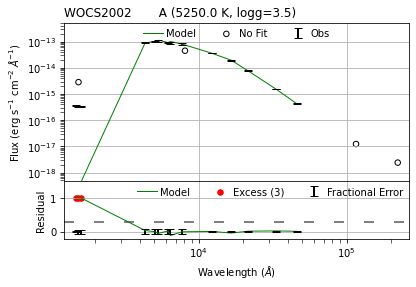

In [2]:
# initialising the binary star
cycle = 1
star  = BinaryStar(name           = 'WOCS2002',                           # name of the star
                  model_to_fit    = 'Koe_logg7.0',                        # model names same as in "models" folder
                  dir_obs         = 'data/vosa_results_38873/objects/',   # location of VOSA SED result files
                  distance        = 831.76,                               # distance in pc
                  distance_err    = 11.0,                                 # distance error in pc
                  free_para       = 3,                                    # number of free parameters
                  filters_to_drop = ['GALEX/GALEX.FUV','WISE/WISE.W3'])   # list of filters not to be fitted 

# Read data from A component fitted with VOSA
star.read_A_comp_from_VOSA(verbose=False)
    
# visualising the SED for the A component
star.visualise_A_component_SED(excess_cutoff=0.3)

# loading and combining the synthetic flux file
star.flux_model, star.T_list = read_model_file(star.model_to_fit, star.flux_A.index,verbose=False)
star.append_residual_to_model()

# initialising scaling factor grid
#    SF limits are calculated from radius limits (0.001 and 2 Rsun by default) 
sf_min, sf_max = sf_from_R(0.001,star.distance), sf_from_R(2,star.distance)
star.sf_list = np.geomspace(sf_min, sf_max, num=300)

# Getting lowest chi2 fit and plotting SEDs

- If you have modified something and want to recalculate the chi2, use `refit=True` in `calculate_chi2`


RUNNING: calculate_chi2 
     Teff            sf       chi2    chi2_r      vgf2     vgfb2  sf_index
0  15250  1.972415e-25  11.487785  1.044344  0.935572  0.179658     110.0
1  15750  1.693390e-25  11.631806  1.057437  0.948656  0.184241     107.0
2  14750  2.297417e-25  11.708532  1.064412  0.955649  0.180195     113.0
3  16500  1.381768e-25  11.851885  1.077444  0.968653  0.190217     103.0
4  14500  2.543318e-25  12.208154  1.109832  1.001077  0.197299     115.0
Computation time = 5.765625 s

B-component fitting parameters: T=15250,sf=1.97e-25,R=0.016384,L=0.013080


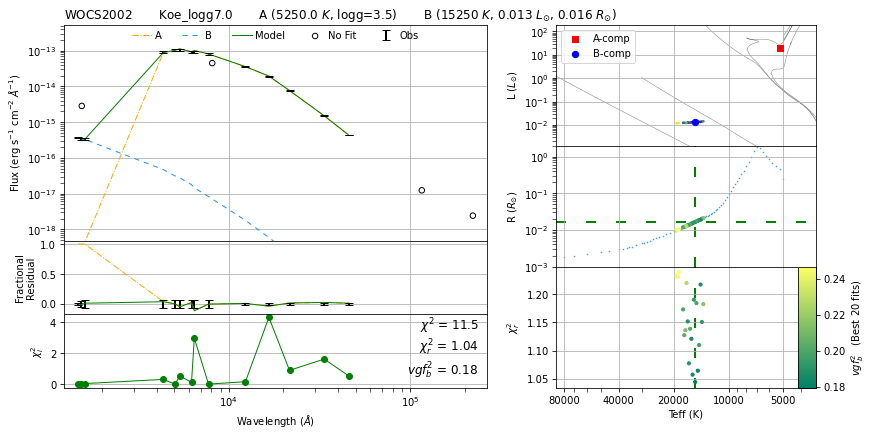

In [3]:
calculate_chi2(star, star.sf_list, star.T_list, cycle=cycle, refit=True)
get_parameters_from_chi2_minimization(star)
star.create_binary_SED_plot(cycle, save_plot=True)

# Noisy iterations
- Adding Gaussian noise to the data and fitting again.
- After N iterations, use the distributions of best fit temperature, luminosity and radius to get realistic errors.
- If errors in temperature are less than step size, the step size is quoted as the errors. 
- If you have modified something and want to recalculate the chi2, use `refit=True` in `calculate_chi2_for_iterations`
- `save_log` saves the calculated parameters in a file for easier analysis


RUNNING: calculate_chi2_for_iterations 
    seed   Teff            sf      chi2    chi2_r      vgf2     vgfb2  \
0  31.0  14750  2.297417e-25  7.539412  0.685401  0.620984  0.143740   
1  88.0  13250  4.019064e-25  8.003137  0.727558  0.669439  0.159481   
2  30.0  14250  2.675970e-25  8.118000  0.738000  0.701586  0.210945   
3  34.0  21000  4.998339e-26  8.357755  0.759796  0.726052  0.218151   
4  95.0  14750  2.297417e-25  8.871352  0.806487  0.754188  0.168086   

     radius  luminosity  
0  0.017683    0.000214  
1  0.023388    0.000374  
2  0.019084    0.000249  
3  0.008248    0.000047  
4  0.017683    0.000214  
Computation time = 57.8125 s

B-component fitting parameters (median+-1sigma):
   T=15500+750-1000, sf=1.87e-25+4.93e-26-4.23e-26, R=0.015973+0.002269-0.001723, L=0.013267+0.005271-0.007650


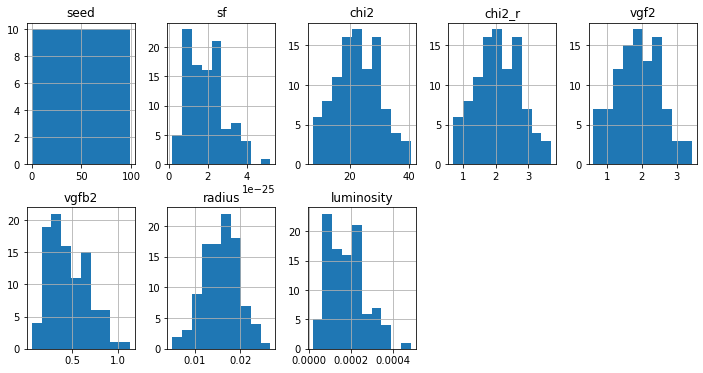

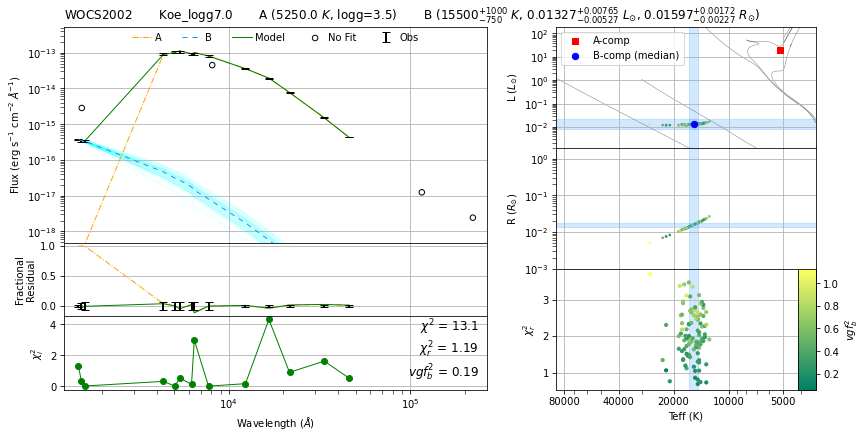

Saving log in log_file_binary.csv


In [5]:
data_chi_iterations = calculate_chi2_for_iterations(
    star, star.sf_list, star.T_list, cycle=cycle, total_iterations=100, refit=True)

data_chi_iterations.hist(layout=(2, 5), figsize=(12, 6))
get_parameters_from_iterations(star)
star.create_binary_SED_plot_iterations(cycle=cycle, save_plot=True)

save_log(star, cycle)